In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

#### PREDICTING A PULSAR STAR using various ML models 

In [2]:
pulsar = pd.read_csv('pulsar_stars.csv')
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Split Data using train_test_split

In [3]:
from sklearn.model_selection import train_test_split

X contains all the columns except the 'target_class' and y contains only the 'target_class' i.e. the actual existance of the pulsar star

In [4]:
X = pulsar.drop('target_class',axis=1)
y = pulsar['target_class']

train_test_split splits the data into 80% as trainging data that will be fed to the model for training and 20% as test data for which the model predicts the 'target_class'

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

Train the model with X_train and y_train data

In [7]:
logm = LogisticRegression()
logm.fit(X_train,y_train)
pred = logm.predict(X_test)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3260
           1       0.93      0.85      0.89       320

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [9]:
print(confusion_matrix(y_test,pred))

[[3240   20]
 [  47  273]]


### KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
kpred = knn.predict(X_test)

In [12]:
print(classification_report(y_test,kpred))
print('\n')
print(confusion_matrix(y_test,kpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3260
           1       0.94      0.81      0.87       320

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



[[3243   17]
 [  61  259]]


In [13]:
error = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ipred = knn.predict(X_test)
    error.append(np.mean(ipred != y_test))

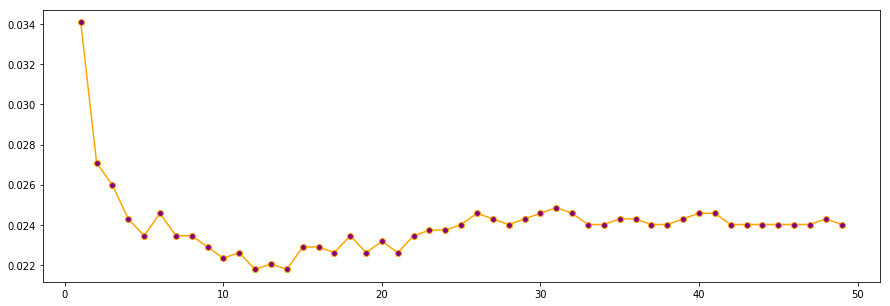

In [14]:
plt.figure(figsize=(15,5))
plt.plot(range(1,50),error,color='orange',marker='o',markerfacecolor='purple')

### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier 

In [16]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dpred = dtree.predict(X_test)

In [17]:
print(classification_report(y_test,dpred))
print('\n')
print(confusion_matrix(y_test,dpred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3260
           1       0.81      0.82      0.82       320

   micro avg       0.97      0.97      0.97      3580
   macro avg       0.90      0.90      0.90      3580
weighted avg       0.97      0.97      0.97      3580



[[3199   61]
 [  57  263]]


### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

In [20]:
print(classification_report(y_test,rfcpred))
print('\n')
print(confusion_matrix(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3260
           1       0.93      0.87      0.90       320

   micro avg       0.98      0.98      0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



[[3238   22]
 [  42  278]]
